In [6]:
# 线性回归拟合二维数据，二维数据的基本关系约为 y = 2x 
# 主要由四个步骤：准备数据——>搭建模型——>迭代训练——>使用模型

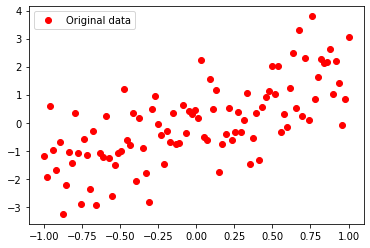

In [7]:
# 生成含噪声的数据
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape)   # 加入噪声

# 显示模拟数据
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [8]:
# 搭建模型：正向
# 模型参数：随机初始化权重和偏置
W = tf.Variable(np.random.randn(), name="weight")   
b = tf.Variable(np.random.randn(), name="bias")

# 线性回归函数
def linear_regression(x):
    return W*x + b


# 搭建模型：反向
# 损失函数
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred-y_true))

# 优化器采用随机梯度下降(SGD)
learning_rate = 0.01  # 学习率
optimizer = tf.keras.optimizers.SGD(learning_rate)

In [10]:
# 计算梯度，更新参数
def run_optimization():   
    # tf.GradientTape()梯度带，可以查看每一次epoch的参数值
    with tf.GradientTape() as tape:
        pred = linear_regression(train_X)
        loss = mean_square(pred, train_Y)
    # 计算梯度
    gradients = tape.gradient(loss, [W, b])
    # 更新W，b
    optimizer.apply_gradients(zip(gradients, [W, b]))

    
# 开始训练
training_steps = 100  # 训练次数
display_step = 2  # 训练2次输出一次

for step in range(1, training_steps+1):
    run_optimization()
    if step % display_step == 0:
        pred = linear_regression(train_X)
        loss = mean_square(pred, train_Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 2, loss: 1.105413, W: 1.406968, b: 0.019021
step: 4, loss: 1.104385, W: 1.411231, b: 0.017452
step: 6, loss: 1.103392, W: 1.415437, b: 0.015945
step: 8, loss: 1.102430, W: 1.419585, b: 0.014498
step: 10, loss: 1.101501, W: 1.423677, b: 0.013108
step: 12, loss: 1.100600, W: 1.427714, b: 0.011773
step: 14, loss: 1.099729, W: 1.431696, b: 0.010492
step: 16, loss: 1.098885, W: 1.435624, b: 0.009261
step: 18, loss: 1.098067, W: 1.439499, b: 0.008078
step: 20, loss: 1.097276, W: 1.443322, b: 0.006943
step: 22, loss: 1.096508, W: 1.447092, b: 0.005852
step: 24, loss: 1.095765, W: 1.450812, b: 0.004805
step: 26, loss: 1.095044, W: 1.454480, b: 0.003799
step: 28, loss: 1.094345, W: 1.458100, b: 0.002833
step: 30, loss: 1.093667, W: 1.461670, b: 0.001905
step: 32, loss: 1.093010, W: 1.465191, b: 0.001014
step: 34, loss: 1.092372, W: 1.468665, b: 0.000158
step: 36, loss: 1.091753, W: 1.472092, b: -0.000664
step: 38, loss: 1.091153, W: 1.475473, b: -0.001453
step: 40, loss: 1.090571, W: 1.47

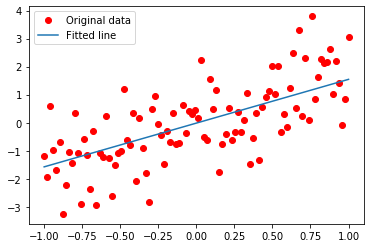

In [11]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W*train_X + b), label='Fitted line')
plt.legend()
plt.show()